# On the efficiency of an autonomous, dynamic information engine operating on a single active particle
## L. Cocconi, L. Chen (https://arxiv.org/abs/2401.08496)
## Supplementary material: numerical methods and figure generation

This notebook contains the (Python) code used to numerically evaluate some of the analytical expressions obtained in implicit form in the main text, as well as to generate the figures appearing therein. 

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline
%matplotlib widget

from matplotlib import rc
rc('text', usetex=True)
plt.rcParams.update({'font.size': 15})

# Direct measurement - Bayesian and Naiive protocols (Sec.II)

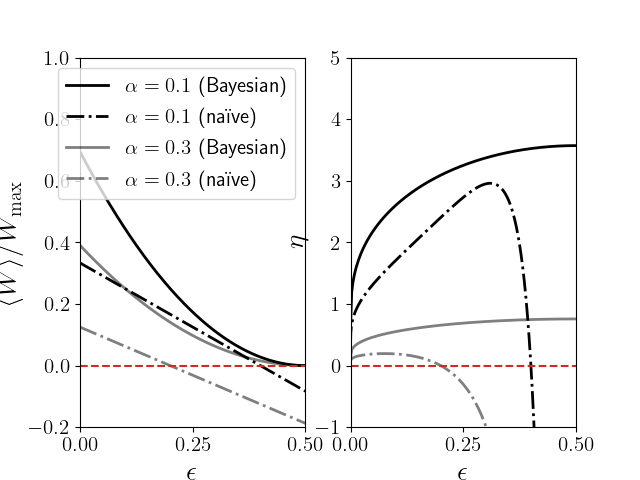

In [2]:
plt.close('all')
def eff_naive(eps,alpha,m,nu):
    #efficiency of naive protocol Eq.(9)
    return nu**2/(4*np.log((1-eps)/eps)) * (1/(2*alpha) - 1/(m*(1-2*eps)))

def eff_bayes(eps,alpha,m,nu):
    #efficiency of Bayesian protocol Eq.(12)
    return (1-2*eps)*nu**2*m/( 4*alpha*(m + 4*alpha) * np.log((1-eps)/eps) )

def work_naive(eps,alpha,m,nu):
    return nu**2/4 * ((m/alpha)*(1/2-eps) - 1)/(2+m/alpha)

def work_bayes(eps,alpha,m,nu):
    return nu**2/4 * (1-2*eps)**2 * (m/alpha)**2/(2 + m/alpha)**2

def epr_all(eps,alpha,m,nu):
    #auxiliary entropy production for direct measurement Eq.(5)
    return alpha*m*(1-2*eps)/(2*alpha + m) * np.log((1-eps)/eps)
    
    
es = np.linspace(1e-5,0.5 - 1e-5,1000)
es_scatt = np.linspace(1e-5,0.5 - 1e-5,200)

plt.figure(1)
plt.subplot(1,2,1)

alpha = 0.1
m = 1
nu = 2

plt.plot(es_scatt,[work_bayes(e,alpha,m,nu) for e in es_scatt], color='k',alpha=1,linewidth=2,label=r'$\alpha=0.1$ (Bayesian)')
plt.plot(es,[work_naive(e,alpha,m,nu) for e in es],color='k',linestyle='-.',linewidth=2,alpha=1,label=r'$\alpha=0.1$ (na{\"i}ve)')


alpha = 0.3
m = 1
nu = 2

plt.plot(es_scatt,[work_bayes(e,alpha,m,nu) for e in es_scatt], color='k',alpha=0.5,linewidth=2,label=r'$\alpha=0.3$ (Bayesian)')
plt.plot(es,[work_naive(e,alpha,m,nu) for e in es],color='k',linestyle='-.',linewidth=2,alpha=0.5,label=r'$\alpha=0.3$ (na{\"i}ve)')


plt.legend(loc='upper right')
#plt.legend(loc='center left', bbox_to_anchor=(1, 2))
plt.hlines(0,0,0.5,color='tab:red',linestyle='--')
plt.ylim(-0.2,1);plt.xlim(0,0.50)

plt.xlabel(r'$\epsilon$',fontsize=20);plt.ylabel(r'$\langle \dot{W} \rangle/\dot{W}_{\rm max}$',fontsize=20)
plt.xticks((0,0.25,0.5))

plt.subplot(1,2,2)
alpha = 0.1
m = 1
nu = 2

plt.plot(es_scatt,[eff_bayes(e,alpha,m,nu) for e in es_scatt], color='k',linewidth=2)
plt.plot(es,[eff_naive(e,alpha,m,nu) for e in es],color='k',linestyle='-.',linewidth=2,alpha=1,label=r'$\alpha=0.1$')

alpha = 0.3
m = 1
nu = 2

plt.plot(es_scatt,[eff_bayes(e,alpha,m,nu) for e in es_scatt], color='k',alpha=0.5,linewidth=2)
plt.plot(es,[eff_naive(e,alpha,m,nu) for e in es],color='k',linestyle='-.',linewidth=2,alpha=0.5,label=r'$\alpha=0.3$')

plt.ylim(-1,5);plt.xlim(0,0.50)
plt.hlines(0,0,0.5,color='tab:red',linestyle='--')

plt.xlabel(r'$\epsilon$',fontsize=20);plt.ylabel(r'$\eta$',fontsize=20)
plt.xticks((0,0.25,0.5))

plt.show()

In [ ]:
plt.tight_layout()

# Indirect measurement - Naiive protocol (Sec.IIIB)

0.1
0.35
1.0


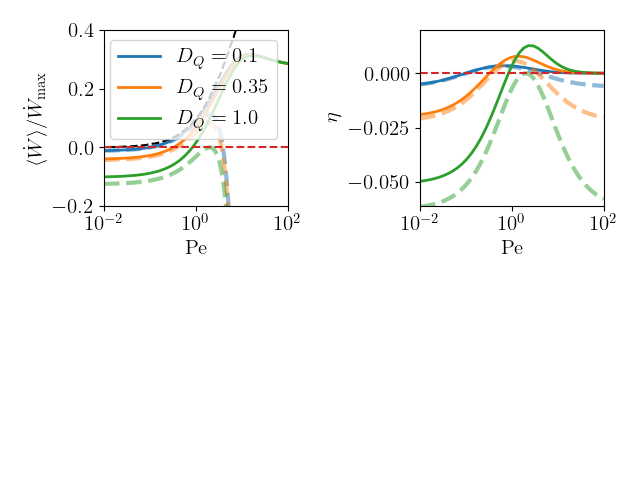

In [9]:
plt.close('all');plt.show()

def Normal_distr(x,mean,var):
    return np.exp(-(x-mean)**2/(2*var))/np.sqrt(2*np.pi * var)

def rho(Q,Pe,Dq,alpha):
    num = np.exp(-Q**2/(Pe + Dq/alpha))
    den = np.sqrt(np.pi * (Pe + Dq/alpha))
    return num/den

def P_st(Q,Pe,Dq,alpha):
    #steady state probability of Q (summed over the subcases \sigma = \pm 1)
    integrand = lambda z: rho(Q-Pe*z/2,Pe,Dq,alpha) * ((1-z)**(-1/2) * (1+z)**(1/2)  +  (1+z)**(-1/2) * (1-z)**(1/2))
    integral_term, int_err = quad(integrand,-1,1)
    return integral_term/(2*np.pi)

def P_st_sigmaplus(Q,Pe,Dq,alpha):
    #steady state probability of Q (summed over the subcases \sigma = \pm 1)
    integrand = lambda z: rho(Q-Pe*z/2,Pe,Dq,alpha) * ((1-z)**(-1/2) * (1+z)**(1/2))
    integral_term, int_err = quad(integrand,-1,1)
    return integral_term/(2*np.pi)

##############Import data obtained in Ref.[23] for the max power output###################

numvals = 400
alphaarray = np.logspace(-4, 3, num=numvals, endpoint=True)
pecarray = 1/alphaarray

## Import work data from text files
inputdatafile = './work_data_and_plotter/alldata_highpec_.txt'
with open(inputdatafile) as f:
    lines = f.readlines()
    indices = np.array([int(line.split()[0]) for line in lines])
    workvals = np.array([float(line.split()[1]) for line in lines])

## Calculate maximum work extracted for each value of Pe
separatedwork = np.split(workvals, numvals)
maxima = np.amax(separatedwork, axis=1)

#################################


def work_lin_naive(Pe,Dq,alpha):
    #Eq.(27)
    return Pe/8*(1 - Pe/4) - Dq/(8*alpha)

def work_tanh_naive(Pe,Dq,alpha):
    #Eq.(26)
    integrand_w_1 = lambda Q: 2 * np.tanh(Q/2)/2 * P_st_sigmaplus(Q,Pe,Dq,alpha)
    integrand_w_2 = lambda Q: -(np.tanh(Q/2)/2)**2 * P_st(Q,Pe,Dq,alpha)
    mean_w = quad(integrand_w_1,-np.inf,np.inf)[0] + quad(integrand_w_2,-np.inf,np.inf)[0]
    return mean_w

def work_lin_naive_numerical(Pe,Dq,alpha):
    #Expectation in Eq.(27), evaluated numerically as a check
    integrand_w_1 = lambda Q: 2 * (Q/4) * P_st_sigmaplus(Q,Pe,Dq,alpha)
    integrand_w_2 = lambda Q: -(Q/4)**2 * P_st(Q,Pe,Dq,alpha)
    mean_w = quad(integrand_w_1,-np.inf,np.inf)[0] + quad(integrand_w_2,-np.inf,np.inf)[0]
    return mean_w

def epr_indirect(Pe,Dq,alpha):
    #Eq.(25)
    return alpha**2 * Pe/Dq * (2 + Pe/2) + 2*alpha

dqs = [0.1,0.35,1.0] #0.3,0.8]
colos = ['tab:blue','tab:orange','tab:green','tab:red']
labels = [r'$D_Q=0.1$',r'$D_Q=0.35$',r'$D_Q=1.0$']

for i in range(len(dqs)):
    dq = dqs[i]
    co = colos[i]
    
    print(dq)
    
    pes_an = np.logspace(-2,2,100)
    pess = np.logspace(-2,2,40)
    
    plt.figure(1)
    
    plt.subplot(2,2,1)
    
    plt.plot(pes_an,[work_lin_naive(p,dq,1) for p in pes_an],linewidth=3,color=co,linestyle='--',alpha=0.5)
    plt.plot(pess,[4*work_tanh_naive(p,dq,1) for p in pess],color=co,linewidth=2,label=labels[i])
    plt.semilogx();plt.xlim(1e-2,100);plt.ylim(-0.2,0.4)
    plt.xlabel(r'${\rm Pe}$');plt.ylabel(r'$\langle \dot{W} \rangle/\dot{W}_{\rm max}$')
    
    plt.subplot(2,2,2)
    
    plt.plot(pes_an,[work_lin_naive(p,dq,1)/epr_indirect(p,dq,1) for p in pes_an],linewidth=3,color=co,linestyle='--',alpha=0.5)
    plt.plot(pess,[4*work_tanh_naive(p,dq,1)/epr_indirect(p,dq,1) for p in pess],color=co,linewidth=2,label=labels[i])
    plt.semilogx();plt.xlim(1e-2,100);plt.ylim(-0.061,0.02)
    plt.xlabel(r'${\rm Pe}$');plt.ylabel(r'$\eta$')
    

plt.figure(1)
plt.subplot(2,2,1);plt.legend()
plt.plot(pecarray, maxima*4, 'k--')
plt.hlines(0,0.01,100,color='tab:red',linestyle='--')

plt.subplot(2,2,2)#;plt.legend()
plt.tight_layout()
plt.hlines(0,0.01,100,color='tab:red',linestyle='--')

In [10]:
#plt.close('all');plt.show()

pes_ex = [0.1,1,5]
colos = ['tab:blue','tab:orange','tab:green']
labels = [r'${\rm Pe}=0.1$',r'${\rm Pe}=1.0$',r'${\rm Pe}=5.0$']

for i in range(3):
    p = pes_ex[i]
    co = colos[i]
    
    print(p)
    
    dqs = np.logspace(-2,2,50)
    
    plt.figure(1)
    
    plt.subplot(2,2,3)
    
    plt.plot(dqs,[work_lin_naive(p,d,1) for d in dqs],linewidth=3,color=co,linestyle='--',alpha=0.5)
    plt.plot(dqs,[4*work_tanh_naive(p,d,1) for d in dqs],color=co,linewidth=2,label=labels[i])
    plt.semilogx();plt.xlim(1e-2,1e2);plt.ylim(-1,0.5)
    plt.xlabel(r'$D_Q$');plt.ylabel(r'$\langle \dot{W} \rangle/\dot{W}_{\rm max}$')
    
    plt.subplot(2,2,4)
    
    plt.plot(dqs,[work_lin_naive(p,d,1)/epr_indirect(p,d,1) for d in dqs],linewidth=3,color=co,linestyle='--',alpha=0.5)
    plt.plot(dqs,[4*work_tanh_naive(p,d,1)/epr_indirect(p,d,1) for d in dqs],color=co,linewidth=2,label=labels[i])
    plt.semilogx();plt.xlim(1e-2,1e2);plt.ylim(-0.06,0.04)
    plt.xlabel(r'$D_Q$');plt.ylabel(r'$\eta$')
    

plt.figure(1)
plt.subplot(2,2,3);plt.legend()

0.1
1
5


In [5]:
plt.subplot(2,2,3);plt.hlines(0,0.01,100,color='tab:red',linestyle='--')
plt.subplot(2,2,4);plt.hlines(0,0.01,100,color='tab:red',linestyle='--')


### Contour plot of efficiency for the naiive linearised protocol as a function of Pe,$D_Q/\alpha$


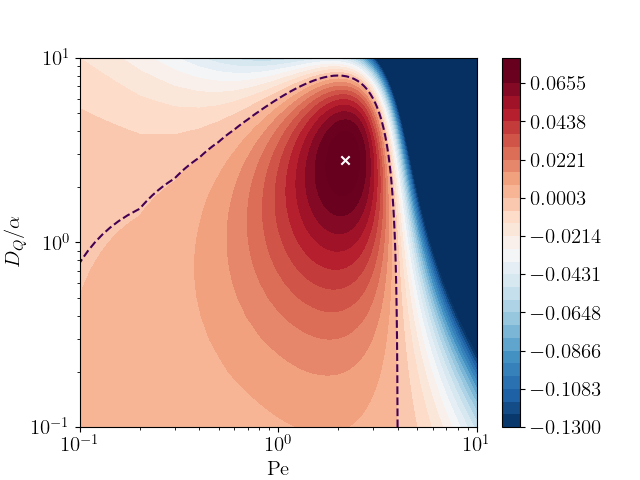

In [11]:
plt.close('all')

def eff(pe,dqa):
    return pe*dqa/8 * (pe * (1 - pe/4) - dqa/8)/(pe * (1 + pe/4) + dqa)

effvec = np.vectorize(eff)

xlist = np.linspace(0.1, 10, 100)
ylist = np.linspace(0.1, 10, 100)
pe, dqa = np.meshgrid(xlist, ylist)
Z = pe*dqa/8 * (pe * (1 - pe/4) - dqa/8)/(pe * (1 + pe/4) + dqa)

plt.contourf(pe, dqa, Z,cmap='RdBu_r',vmin=-0.13, vmax=0.07, levels=np.linspace(-100,0.1,30))
plt.contourf(pe, dqa, Z,cmap='RdBu_r',vmin=-0.13, vmax=0.07, levels=np.linspace(-0.13,0.08,30))
plt.colorbar()
plt.contour(pe, dqa, Z, [0.],linestyles='dashed')
plt.scatter(2.1590460704373875,2.797583944809771,marker='x',c='w')

plt.loglog()
plt.xlabel(r'$\rm Pe$');plt.ylabel(r'$D_Q/\alpha$')


plt.show()

# Indirect measurement - Bayesian protocol (Sec.IIIC)

First, generate data for panel where $D_Q$ is varied

In [ ]:
def F_opt(Q,intP_yerr,intP_nerr):
    #optimal force, defined without the nu prefactor since it doesn't play any role in the following
    integrand = lambda Q1: np.tanh(Q1/2) * Normal_distr(Q,Q1,Dq/(2*alpha)) * regul_ratio(Q1,Q,intP_nerr,intP_yerr) #* intP_nerr(Q1)/intP_yerr(Q)
    std = np.sqrt(Dq/(2*alpha) + Pe/2 + Pe**2/8)
    return -1/2 * quad(integrand,Q-10*std,Q+10*std)[0]  

def Normal_distr(x,mean,var):
    return np.exp(-(x-mean)**2/(2*var))/np.sqrt(2*np.pi * var)

def rho(Q,Pe,Dq,alpha):
    num = np.exp(-Q**2/(Pe + Dq/alpha))
    den = np.sqrt(np.pi * (Pe + Dq/alpha))
    return num/den

def P_st(Q,Pe,Dq,alpha):
    #steady state probability of Q (summed over the subcases \sigma = \pm 1)
    integrand = lambda z: rho(Q-Pe*z/2,Pe,Dq,alpha) * ((1-z)**(-1/2) * (1+z)**(1/2)  +  (1+z)**(-1/2) * (1-z)**(1/2))
    integral_term, int_err = quad(integrand,-1,1)
    return integral_term/(2*np.pi)

def P_st_sigmaplus(Q,Pe,Dq,alpha):
    #steady state probability of Q (summed over the subcases \sigma = \pm 1)
    integrand = lambda z: rho(Q-Pe*z/2,Pe,Dq,alpha) * ((1-z)**(-1/2) * (1+z)**(1/2))
    integral_term, int_err = quad(integrand,-1,1)
    return integral_term/(2*np.pi)


pes = np.logspace(-2,2,30)

for dq in [0.1,1.0,10]:
    print(dq)
    ws = []
    for Pe in pes:

        Dq = dq
        alpha = 1

        std = np.sqrt(Dq/(2*alpha) + Pe/2 + Pe**2/8)

        Qs_for_interpolation = np.linspace(-10*std,10*std,10000)
        PQs_yerr = np.array([P_st(Q,Pe,Dq,alpha) for Q in Qs_for_interpolation]) 
        PQs_nerr = np.array([P_st(Q,Pe,0 ,alpha) for Q in Qs_for_interpolation])

        PQs_yerr += 1e-20
        PQs_nerr += 1e-20

        intP_yerr = CubicSpline(Qs_for_interpolation, PQs_yerr)
        intP_nerr = CubicSpline(Qs_for_interpolation, PQs_nerr)  

        intgrand_w = lambda Q: -2*F_opt(Q,intP_yerr,intP_nerr)*P_st_sigmaplus(Q,Pe,Dq,alpha)-F_opt(Q,intP_yerr,intP_nerr)**2 * P_st(Q,Pe,Dq,alpha)

        mean_w = quad(intgrand_w,-10*std,10*std)[0]

        ws.append(mean_w)
        #print(Pe,mean_w)
        
    datatosave = np.zeros((len(ws),2))
    datatosave[:,0] = pes
    datatosave[:,1] = np.array(ws)
    np.save('ws_bayesian_indirect_Dq'+str(dq)+'.npy', datatosave)

Second, generate data for panel where Pe is varied

In [ ]:
def F_opt(Q,intP_yerr,intP_nerr):
    #optimal force, defined without the nu prefactor since it doesn't play any role in the following
    integrand = lambda Q1: np.tanh(Q1/2) * Normal_distr(Q,Q1,Dq/(2*alpha)) * regul_ratio(Q1,Q,intP_nerr,intP_yerr) #* intP_nerr(Q1)/intP_yerr(Q)
    std = np.sqrt(Dq/(2*alpha) + Pe/2 + Pe**2/8)
    return -1/2 * quad(integrand,Q-10*std,Q+10*std)[0]  

def Normal_distr(x,mean,var):
    return np.exp(-(x-mean)**2/(2*var))/np.sqrt(2*np.pi * var)

def rho(Q,Pe,Dq,alpha):
    num = np.exp(-Q**2/(Pe + Dq/alpha))
    den = np.sqrt(np.pi * (Pe + Dq/alpha))
    return num/den

def P_st(Q,Pe,Dq,alpha):
    #steady state probability of Q (summed over the subcases \sigma = \pm 1)
    integrand = lambda z: rho(Q-Pe*z/2,Pe,Dq,alpha) * ((1-z)**(-1/2) * (1+z)**(1/2)  +  (1+z)**(-1/2) * (1-z)**(1/2))
    integral_term, int_err = quad(integrand,-1,1)
    return integral_term/(2*np.pi)

def P_st_sigmaplus(Q,Pe,Dq,alpha):
    #steady state probability of Q (summed over the subcases \sigma = \pm 1)
    integrand = lambda z: rho(Q-Pe*z/2,Pe,Dq,alpha) * ((1-z)**(-1/2) * (1+z)**(1/2))
    integral_term, int_err = quad(integrand,-1,1)
    return integral_term/(2*np.pi)


dqs = np.logspace(-2,3,30)

for Pe in [0.1,1.0,10]:
    print(Pe)
    ws = []
    for Dq in dqs:

        alpha = 1

        std = np.sqrt(Dq/(2*alpha) + Pe/2 + Pe**2/8)

        Qs_for_interpolation = np.linspace(-10*std,10*std,10000)
        PQs_yerr = np.array([P_st(Q,Pe,Dq,alpha) for Q in Qs_for_interpolation]) 
        PQs_nerr = np.array([P_st(Q,Pe,0 ,alpha) for Q in Qs_for_interpolation])

        PQs_yerr += 1e-20
        PQs_nerr += 1e-20

        intP_yerr = CubicSpline(Qs_for_interpolation, PQs_yerr)
        intP_nerr = CubicSpline(Qs_for_interpolation, PQs_nerr)  

        intgrand_w = lambda Q: -2*F_opt(Q,intP_yerr,intP_nerr)*P_st_sigmaplus(Q,Pe,Dq,alpha)-F_opt(Q,intP_yerr,intP_nerr)**2 * P_st(Q,Pe,Dq,alpha)

        mean_w = quad(intgrand_w,-10*std,10*std)[0]

        ws.append(mean_w)
        #print(Pe,mean_w)
        
    datatosave = np.zeros((len(ws),2))
    datatosave[:,0] = dqs
    datatosave[:,1] = np.array(ws)
    np.save('ws_bayesian_indirect_Pe'+str(Pe)+'.npy', datatosave)

Finally, we simply plot the data read from file

Text(0, 0.5, '$\\eta$')

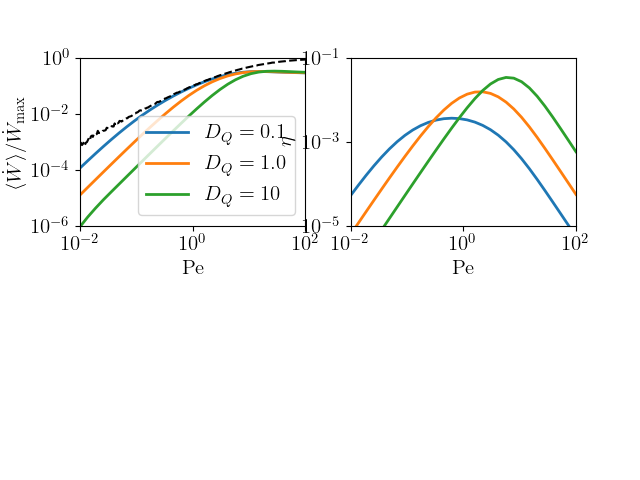

In [15]:
plt.close('all');plt.show()
def epr_indirect(Pe,Dq,alpha):
    return alpha**2 * Pe/Dq * (2 + Pe/2) + 2*alpha

alpha = 1
labels = [r'$D_Q=0.1$',r'$D_Q=1.0$',r'$D_Q=10$']
dqs = [0.1,1.0,10]

for i in range(3):
    dq = dqs[i]
    dataset = np.load('ws_bayesian_indirect_Dq'+str(dq)+'.npy')
    
    plt.subplot(2,2,1)
    plt.plot(dataset[:,0],4*dataset[:,1],label=labels[i],linewidth=2)
    
    plt.subplot(2,2,2)
    plt.plot(dataset[:,0],[4*dataset[i,1]/epr_indirect(dataset[i,0],dq,alpha) for i in range(len(dataset[:,0]))],label=labels[i],linewidth=2)
    
plt.subplot(2,2,1);plt.legend()
plt.plot(pecarray, maxima*4, 'k--')
plt.loglog();plt.xlim(1e-2,100);plt.ylim(1e-6,1e0)
plt.xlabel(r'$\rm Pe$');plt.ylabel(r'$\langle \dot{W} \rangle/\dot{W}_{\rm max}$')

plt.subplot(2,2,2);#plt.legend()
plt.loglog();plt.xlim(1e-2,100);plt.ylim(1e-5,0.1)
plt.xlabel(r'$\rm Pe$');plt.ylabel(r'$\eta$')

In [ ]:
plt.tight_layout()

In [16]:
#plt.close('all');plt.show()
def epr_indirect(Pe,Dq,alpha):
    return alpha**2 * Pe/Dq * (2 + Pe/2) + 2*alpha

alpha = 1
labels = [r'${\rm Pe}=0.1$',r'${\rm Pe}=1.0$',r'${\rm Pe}=10$']
pes = [0.1,1.0,10]

for i in range(3):
    Pe = pes[i]
    dataset = np.load('ws_bayesian_indirect_Pe'+str(Pe)+'.npy')
    
    plt.subplot(2,2,3)
    plt.plot(dataset[:,0],4*dataset[:,1],label=labels[i],linewidth=2)
    
    plt.subplot(2,2,4)
    plt.plot(dataset[:,0],[4*dataset[i,1]/epr_indirect(Pe,dataset[i,0],alpha) for i in range(len(dataset[:,0]))],label=labels[i],linewidth=2)
    
plt.subplot(2,2,3);plt.legend()
plt.loglog();plt.xlim(1e-2,1e2);plt.ylim(1e-5,1)
plt.xlabel(r'$D_Q$');plt.ylabel(r'$\langle \dot{W} \rangle/\dot{W}_{\rm max}$')

plt.subplot(2,2,4);#plt.legend()
plt.loglog();plt.xlim(1e-2,1e2);plt.ylim(1e-5,1e-1)
plt.xlabel(r'$D_Q$');plt.ylabel(r'$\eta$')

plt.tight_layout()